# Imports

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import pandas as pd
import numpy as np
import math
import unicodedata

matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()

True

# Graphs

## Half-life

In [2]:
N0        = 6e+23
dec_const = 3.8394e-12

In [3]:
def exp_decay(N0:float, dec_const: float, t: int) -> float:
    return N0 * math.exp(-1 * dec_const * t)

def half_life(dec_const: float) -> float:
    return math.log(2) / dec_const

In [4]:
# t_half = exp_decay(N0, dec_const, 5730 * 365.25 * 24 * 3600)
t_half_sec = half_life(dec_const)
t_half_yrs = t_half_sec / 3600 / 24 / 365.25
t_half_mil = t_half_yrs / 1000


print(t_half_sec)
print(t_half_yrs)
print(t_half_mil)
exp_decay(N0, dec_const, t_half_sec)

180535286909.39868
5720.8180251159365
5.720818025115936


3e+23

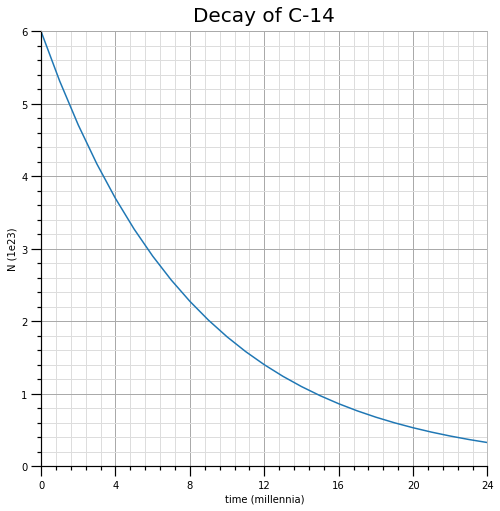

In [5]:
# setup the plot, add a figure and a set of axis
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
ax = f.add_subplot(1,1,1)

# limits and spines
ax.set_xlim(0,24e+3)
ax.set_ylim(0,6e+23)
ax.spines['top'].set_color("#aaaaaa")
ax.spines['right'].set_color("#aaaaaa")
ax.spines['left'].set(linewidth=1.2)
ax.spines['bottom'].set(linewidth=1.2)


# tick marks
def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x  / 1000)}"


def major_y_tick(y, pos):
    if math.isclose(6e+23, y):
        return "6"
    else:
        return f"{int(y  / 1e+23)}"


ax.xaxis.set_major_locator(MultipleLocator(4000))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(1e+23))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_formatter(minor_x_tick)
ax.xaxis.set_major_formatter(major_x_tick)
ax.yaxis.set_minor_formatter(minor_y_tick)
ax.yaxis.set_major_formatter(major_y_tick)

ax.tick_params(which='minor', width=1.2, length=4, color="#000000")
ax.tick_params(which='major', width=1.2, length=10, color="#000000")
ax.grid(which="major", linewidth=1, color='#aaaaaa', linestyle="-")
ax.grid(which="minor", linewidth=1, color='#dddddd', linestyle="-")

ax.set_title("Decay of C-14", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("time (millennia)")
ax.set_ylabel("N (1e23)")

t_vals = np.arange(25) * 1000
N_vals = [exp_decay(N0, dec_const, i * 365.25 * 24 * 3600) for i in t_vals]
ax.plot(t_vals, N_vals)
plt.savefig("./images/c-14_decay.png", facecolor="#ffffff")

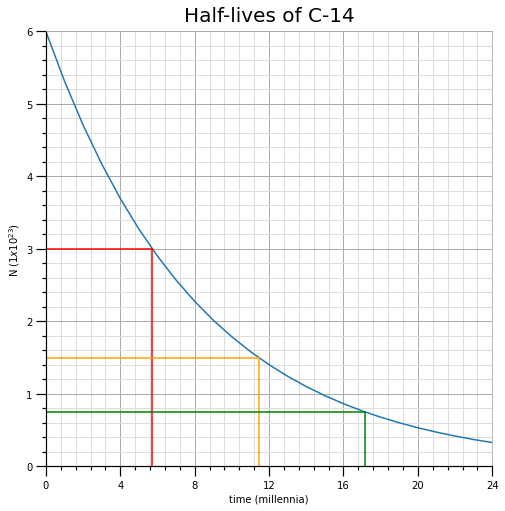

In [6]:
# setup the plot, add a figure and a set of axis
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
ax = f.add_subplot(1,1,1)

# limits and spines
ax.set_xlim(0,24e+3)
ax.set_ylim(0,6e+23)
ax.spines['top'].set_color("#aaaaaa")
ax.spines['right'].set_color("#aaaaaa")
ax.spines['left'].set(linewidth=1.2)
ax.spines['bottom'].set(linewidth=1.2)


# tick marks
def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x  / 1000)}"


def major_y_tick(y, pos):
    if math.isclose(6e+23, y):
        return "6"
    else:
        return f"{int(y  / 1e+23)}"


ax.xaxis.set_major_locator(MultipleLocator(4000))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(1e+23))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_formatter(minor_x_tick)
ax.xaxis.set_major_formatter(major_x_tick)
ax.yaxis.set_minor_formatter(minor_y_tick)
ax.yaxis.set_major_formatter(major_y_tick)

ax.tick_params(which='minor', width=1.2, length=4, color="#000000")
ax.tick_params(which='major', width=1.2, length=10, color="#000000")
ax.grid(which="major", linewidth=1, color='#aaaaaa', linestyle="-")
ax.grid(which="minor", linewidth=1, color='#dddddd', linestyle="-")

ax.set_title("Half-lives of C-14", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("time (millennia)")
ax.set_ylabel("N ($1 x 10^{23}$)")

t_vals = np.arange(25) * 1000
N_vals = [exp_decay(N0, dec_const, i * 365.25 * 24 * 3600) for i in t_vals]
ax.plot(t_vals, N_vals)
ax.plot([0, t_half_yrs], [exp_decay(N0, dec_const, t_half_sec), exp_decay(N0, dec_const, t_half_sec)], color="red")
ax.plot([t_half_yrs, t_half_yrs], [exp_decay(N0, dec_const, t_half_sec), 0], color="red")
ax.plot([0, t_half_yrs * 2], [exp_decay(N0, dec_const, t_half_sec) / 2, exp_decay(N0, dec_const, t_half_sec) / 2], color="orange")
ax.plot([t_half_yrs * 2, t_half_yrs * 2], [exp_decay(N0, dec_const, t_half_sec) / 2, 0], color="orange")

ax.plot([0, t_half_yrs * 3], [exp_decay(N0, dec_const, t_half_sec) / 4, exp_decay(N0, dec_const, t_half_sec) / 4], color="green")
ax.plot([t_half_yrs * 3, t_half_yrs * 3], [exp_decay(N0, dec_const, t_half_sec) / 4, 0], color="green")
plt.savefig("./images/c-14_t_half.png", facecolor="#ffffff")


## Nuclear Stability

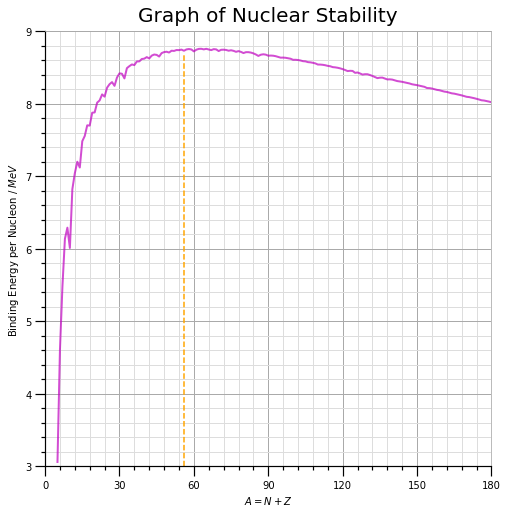

In [7]:


def SEMF(Z, N):
    """Calculate the average binding energy per nucleon for nucleus Z, N.

    Calculate the average nuclear binding energy per nucleon for a nucleus
    with Z protons and N neutrons, using the semi-empirical mass formula and
    parameters of J. W. Rohlf, "Modern Physics from alpha to Z0", Wiley (1994).

    Z and N can be NumPy arrays or scalar values.

    """

    # The parameterization of the SEMF to use.
    aV, aS, aC, aA, delta = 15.75, 17.8, 0.711, 23.7, 11.18

    # Covert Z and N to NumPy arrays if they aren't already
    Z, N = np.atleast_1d(Z), np.atleast_1d(N)
    # Total number of nucleons
    A = Z + N

    # The pairing term is -delta for Z and N both odd, +delta for Z and N both
    # even, and 0 otherwise. Create an array of the sign of this term so that
    # we can vectorize the calculation across the arrays Z and N.
    sgn = np.zeros(Z.shape)
    sgn[(Z%2) & (N%2)] = -1
    sgn[~(Z%2) & ~(N%2)] = +1

    # The SEMF for the average binding energy per nucleon.
    E = (aV - aS / A**(1/3) - aC * Z**2 / A**(4/3) -
         aA * (A-2*Z)**2/A**2 + sgn * delta/A**(3/2))

    # Return E as a scalar or array as appropriate to the input Z.
    if Z.shape[0] == 1:
        return float(E)
    return E

# Read the experimental data into a Pandas DataFrame.
df = pd.read_fwf('data/mass.mas03', usecols=(2,3,4,11),
              names=('N', 'Z', 'A', 'avEbind'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the avEbind column won't be numeric. Coerce to float and drop these entries.
df['avEbind'] = pd.to_numeric(df['avEbind'], errors='coerce')
df = df.dropna()
# Also convert from keV to MeV.
df['avEbind'] /= 1000

# Group the DataFrame by nucleon number, A.
gdf = df.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
maxavEbind = gdf.apply(lambda t: t[t.avEbind==t.avEbind.max()])

# Add a column of estimated binding energies calculated using the SEMF.
maxavEbind['Eapprox'] = SEMF(maxavEbind['Z'], maxavEbind['N'])



f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
ax = f.add_subplot(1,1,1)


ax.spines['top'].set_color("#aaaaaa")
ax.spines['right'].set_color("#aaaaaa")
ax.spines['left'].set(linewidth=1.2)
ax.spines['bottom'].set(linewidth=1.2)

ax.set_ylim(3, 9)
ax.set_xlim(0, 180)


# tick marks
def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x)}"


def major_y_tick(y, pos):
    return f"{int(y)}"


ax.xaxis.set_major_locator(MultipleLocator(30))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_formatter(minor_x_tick)
ax.xaxis.set_major_formatter(major_x_tick)
ax.yaxis.set_minor_formatter(minor_y_tick)
ax.yaxis.set_major_formatter(major_y_tick)

ax.tick_params(which='minor', width=1.2, length=4, color="#000000")
ax.tick_params(which='major', width=1.2, length=10, color="#000000")
ax.grid(which="major", linewidth=1, color='#aaaaaa', linestyle="-")
ax.grid(which="minor", linewidth=1, color='#dddddd', linestyle="-")








ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'Binding Energy per Nucleon / $MeV$')
# We don't expect the SEMF to work very well for light nuclei with small
# average binding energies, so display only data relevant to avEbind > 7 MeV.


# ax.plot(maxavEbind['A'], maxavEbind['avEbind'], alpha=0.7, lw=2, label='Ame2003')
ax.plot(maxavEbind['A'], maxavEbind['Eapprox'], alpha=0.7, lw=2, c='m',label='SEMF')
ax.plot([56, 56], [0, 8.7], color="orange", linestyle="--")

ax.set_title("Graph of Nuclear Stability", fontsize=20, verticalalignment='bottom')

plt.savefig("./images/nuclear_stability.png", facecolor="#ffffff")

## Gravitational Field Strength

radius of earth: 6.37e6
mass of earth: 5.98e24

In [8]:
earth_r = 6370000
earth_m = 5.98e24

def sphere_v(r: float) -> float:
    return (4/3) * math.pi * r**3

def density(m: float, v: float) -> float:
    return m / v

earth_v = sphere_v(earth_r)
earth_p = density(earth_m, earth_v)

print("mass: ", earth_m)
print("radius: ", earth_r)
print("volume: ", earth_v)
print("density: ", earth_p)

mass:  5.98e+24
radius:  6370000
volume:  1.0826969324300023e+21
density:  5523.244613410425


In [18]:
G = 6.67e-11

def F(m_1: float, m_2:float, r: float) -> float:
    return G * ((m_1 * m_2) / r**2)

def g(M: float, r: float) -> float:
    return G * (M / r**2)

def g_planet(M: float, R: float, P: float, r: float) -> float:
    if r >= R:
        return (g(M, R) * R**2)/(r**2)
    else: 
        return 0 if r == 0 else g((P * sphere_v(r)), r)
    
def V(M: float, r: float):
    return -1 * (G * M) / r
        

In [10]:
r_vals_1 = np.linspace(0, earth_r, 200)
r_vals_2 = np.linspace(earth_r, earth_r*6, 800)
g_vals_1 = [g_planet(earth_m, earth_r, earth_p, i) for i in r_vals_1]
g_vals_2 = [g_planet(earth_m, earth_r, earth_p, i) for i in r_vals_2]

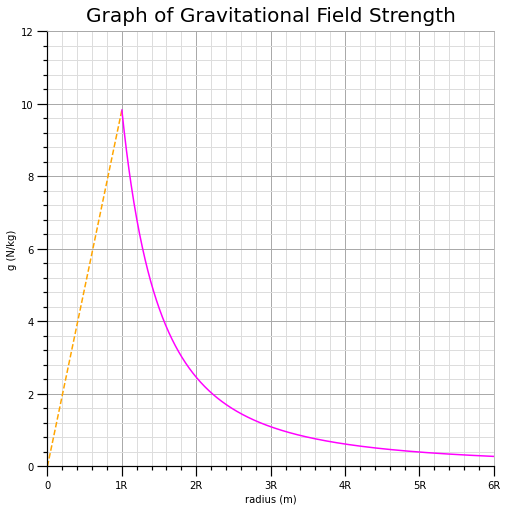

In [17]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
ax = f.add_subplot(1,1,1)


ax.spines['top'].set_color("#aaaaaa")
ax.spines['right'].set_color("#aaaaaa")
ax.spines['left'].set(linewidth=1.2)
ax.spines['bottom'].set(linewidth=1.2)

ax.set_ylim(0, 12)
ax.set_xlim(0, 6 * earth_r)


# tick marks
def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x / earth_r)}R" if x != 0 else "0"


def major_y_tick(y, pos):
    return f"{int(y)}"


ax.xaxis.set_major_locator(MultipleLocator(earth_r))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_formatter(minor_x_tick)
ax.xaxis.set_major_formatter(major_x_tick)
ax.yaxis.set_minor_formatter(minor_y_tick)
ax.yaxis.set_major_formatter(major_y_tick)

ax.tick_params(which='minor', width=1.2, length=4, color="#000000")
ax.tick_params(which='major', width=1.2, length=10, color="#000000")
ax.grid(which="major", linewidth=1, color='#aaaaaa', linestyle="-")
ax.grid(which="minor", linewidth=1, color='#dddddd', linestyle="-")


ax.set_xlabel(r'radius (m)')
ax.set_ylabel(r'g (N/kg)')



ax.plot(r_vals_1, g_vals_1, color="orange", linestyle="--")
ax.plot(r_vals_2, g_vals_2, color="magenta", linestyle="-")

ax.set_title("Graph of Gravitational Field Strength", fontsize=20, verticalalignment='bottom')

plt.savefig("./images/gravitational_field_strength.png", facecolor="#ffffff")

In [19]:
print(V(earth_m, earth_r))

-62616326.53061225
